# Fit a Gaussian with GMM

https://stackoverflow.com/questions/40182684/applying-sklearn-gaussian-mixture-algorithm-to-fit-gm-curves

In [152]:
import  numpy as np

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.mixture    import GMM, GaussianMixture
from scipy.stats        import norm

In [153]:
def load_data_xy():    
    rawdata='C:\\Python34\\datasets\\matkaaika_V1.csv'
    df = pd.read_csv(rawdata)

    # Delete unnecessary columns
    col_to_delete=['0', 'lunta', 'huono keli']
    df=df.drop(col_to_delete, 1)

    # Delete rows with missing values
    df = df.dropna()
    print(df.describe())
        
    X=df['min8'].values
    X=X.reshape(-1, 1)
    y=df['kesto'].values
    return(X, y, df)
X, y, df = load_data_xy()

            min8      kesto  viikonpaiva
count   30.00000  30.000000    30.000000
mean    54.80000  46.733333     3.233333
std     46.41596   5.576634     1.735697
min   -120.00000  42.000000     1.000000
25%     38.00000  43.250000     2.000000
50%     55.50000  44.000000     3.000000
75%     76.25000  47.750000     4.000000
max    160.00000  61.000000     7.000000


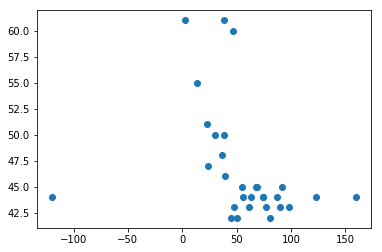

In [154]:
# Scatter plot
plt.scatter(X, y)

### Make auxiliary mirroring just to get more data

In [155]:
def mirror(X, y):
    Xnew = -90.0 - X
    ynew = y
    X = np.append(X, Xnew)
    y = np.append(y, ynew)
    return(X, y)

#X, y = mirror(X, y)
#plt.scatter(X, y)

In [156]:
#Center the x data 
X = X - X[np.argmax(y)]
# Normalize the y data
y = y-np.min(y)
y = y/np.sum(y)

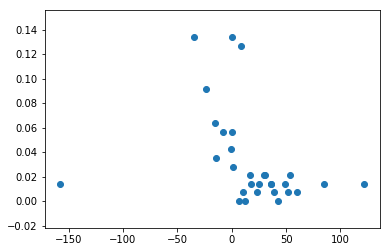

In [157]:
# Scatter plot
plt.scatter(X, y)

In [158]:
#Generate a random sample of size from the X points
line_distribution   = np.random.choice(a = X.ravel(), size = 100000, p = y)
number_points       = len(line_distribution)

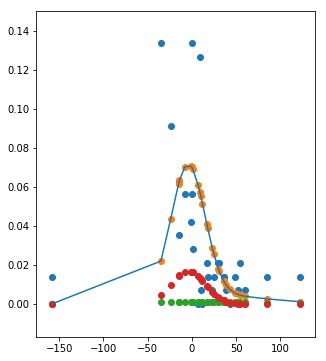

In [159]:
#Run the fit
gmm = GaussianMixture(n_components = 2)
gmm.fit(np.reshape(line_distribution, (number_points, 1)))
gauss_mixt = np.array([p * norm.pdf(X.ravel(), mu, sd) for mu, sd, p in zip(gmm.means_.flatten(), np.sqrt(gmm.covariances_.flatten()), gmm.weights_)])
gauss_mixt_t = np.sum(gauss_mixt, axis = 0)  

gauss_mixt_t = gauss_mixt_t/np.sum(gauss_mixt_t)

#Plot the data
fig, axis = plt.subplots(1, 1, figsize=(5, 6))
axis.scatter(X, y, label = 'Normalized observed flux')
axis.scatter(X, gauss_mixt_t, label = 'n components fit')

a = np.argsort(X.ravel())
axis.plot(X[a], gauss_mixt_t[a], label = 'n components fit')

for i in range(len(gauss_mixt)):
    axis.scatter(X, gauss_mixt[i], label = 'Gaussian '+str(i))

In [160]:
print(np.sum(y))
print(np.sum(gauss_mixt_t))

1.0
1.0
